In [8]:
import pandas as pd
import numpy as np
import bilby
import lal
import gwpy
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import copy

import sys
sys.path.append("..")

from event_table import call_event_table
from create_post_dict import create_post_dict, extract_relevant_info
from waveforms import mem_freq_XPHM, mem_freq_XPHM_only


In [ ]:
for event_number in range(80):
    event_name, file_path, trigger_time, duration, waveform, data_file = call_event_table()[event_number]
    #print(event_name)
    try:
        samples, meta_dict, config_dict, priors, psds, calibration = create_post_dict(file_path, waveform)
    except:
        
        continue
    args = extract_relevant_info(meta_dict, config_dict)
    if 'V1' in args['detectors']:
        try:
            print(event_name)
            temp = psds['V1']
        except:
            print(f'{event_name} has a missing V1 psd')

Jitter time setting cannot be found. Use default setting.
Jitter time setting cannot be found. Use default setting.
Jitter time setting cannot be found. Use default setting.
Error: Unable to find distance marginalization lookup table
Jitter time setting cannot be found. Use default setting.
Jitter time setting cannot be found. Use default setting.
GW170729
GW170729 has a missing V1 psd
Jitter time setting cannot be found. Use default setting.
GW170809
GW170809 has a missing V1 psd
Jitter time setting cannot be found. Use default setting.
GW170814
Jitter time setting cannot be found. Use default setting.
GW170818
Jitter time setting cannot be found. Use default setting.
Jitter time setting cannot be found. Use default setting.
GW190403
Jitter time setting cannot be found. Use default setting.
GW190408
Jitter time setting cannot be found. Use default setting.
GW190413_134308
Jitter time setting cannot be found. Use default setting.
GW190413_052954
Jitter time setting cannot be found. Use

23:02 bilby INFO    : Downloading analysis data for ifo L1


Jitter time setting cannot be found. Use default setting.
{'duration': 4.0, 'sampling_frequency': 2048.0, 'maximum_frequency': 896, 'minimum_frequency': 20.0, 'reference_frequency': 20.0, 'waveform_approximant': 'IMRPhenomXPHM', 'trigger_time': 1187058327.081509, 'detectors': ['L1', 'H1', 'V1'], 'start_time': None, 'end_time': None, 'post_trigger_duration': 2.0, 'tukey_roll_off': 0.4, 'distance_marginalization': 'True', 'time_marginalization': 'True', 'reference_frame': 'H1L1V1', 'time_reference': 'geocent', 'jitter_time': True, 'channel_dict': {'H1': 'DCH-CLEAN_STRAIN_C02', 'L1': 'DCH-CLEAN_STRAIN_C02', 'V1': 'Hrec_hoft_V1O2Repro2A_16384Hz'}, 'distance_marginalization_lookup_table': '/home/daniel.williams/events/O3/o3a_final/run_directories//GW170818/TD.npz'}
information
event name:  GW170818
detectors:  ['L1', 'H1', 'V1']


23:02 bilby INFO    : Downloading analysis data for ifo H1


Using pre-computed psd from results file


23:02 bilby INFO    : Downloading analysis data for ifo V1


Using pre-computed psd from results file
Using pre-computed psd from results file
[Interferometer(name='L1', power_spectral_density=PowerSpectralDensity(frequency_array=[0.00000e+00 2.50000e-01 5.00000e-01 ... 1.02325e+03 1.02350e+03
 1.02375e+03], psd_array=[5.00000e-01 5.00000e-01 5.00000e-01 ... 2.16067e-46 2.21825e-46
 4.20475e-46], asd_array=[7.07106781e-01 7.07106781e-01 7.07106781e-01 ... 1.46992177e-23
 1.48937907e-23 2.05054871e-23]), minimum_frequency=20.0, maximum_frequency=896.0, length=4.0, latitude=30.562894333333332, longitude=-90.77424038888887, elevation=-6.574, xarm_azimuth=197.7165, yarm_azimuth=287.7165, xarm_tilt=-0.0003121, yarm_tilt=-0.0006107), Interferometer(name='H1', power_spectral_density=PowerSpectralDensity(frequency_array=[0.00000e+00 2.50000e-01 5.00000e-01 ... 1.02325e+03 1.02350e+03
 1.02375e+03], psd_array=[5.00000e-01 5.00000e-01 5.00000e-01 ... 1.13815e-46 1.12502e-46
 1.99526e-44], asd_array=[7.07106781e-01 7.07106781e-01 7.07106781e-01 ... 1.06684

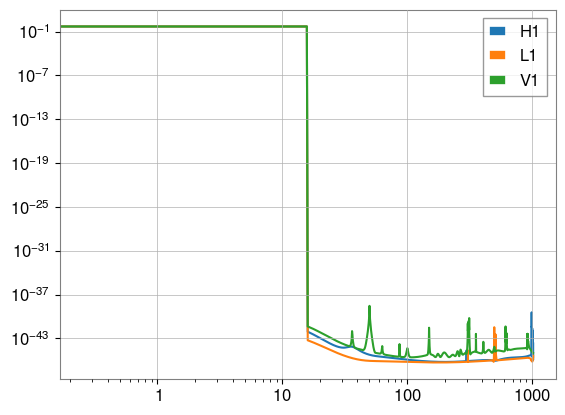

In [9]:
from reweight_mem_parallel import call_data_GWOSC

event_number = 8
event_name, file_path, trigger_time, duration, waveform, data_file = call_event_table()[event_number]
samples, meta_dict, config_dict, priors, psds, calibration = create_post_dict(file_path, waveform)
args = extract_relevant_info(meta_dict, config_dict)

logger = bilby.core.utils.logger

sampling_frequency = args['sampling_frequency']
maximum_frequency = args['maximum_frequency']
minimum_frequency = args['minimum_frequency']
reference_frequency = args['reference_frequency']
roll_off = args['tukey_roll_off']
duration = args['duration']
post_trigger_duration = args['post_trigger_duration']
trigger_time = args['trigger_time']
detectors = args['detectors']

print(args)

print('information')
print('event name: ', event_name)
print('detectors: ', detectors)

if 'V1' in args['detectors']:
    try:
        temp = psds['V1']
    except:
        print(f'{event_name} has a missing V1 psd')

end_time = trigger_time + post_trigger_duration
start_time = end_time - duration

psd_duration = 32*duration # deprecated
psd_start_time = start_time - psd_duration # deprecated
psd_end_time = start_time # deprecated

waveform_name = args['waveform_approximant']

ifo_list= call_data_GWOSC(logger, args, 
                        calibration, samples, detectors,
                        start_time, end_time, 
                        psd_start_time, psd_end_time, 
                        duration, sampling_frequency, 
                        roll_off, minimum_frequency, maximum_frequency,
                        psds_array=psds)

print(ifo_list)

plt.figure()
plt.loglog(psds['H1'][:, 0], psds['H1'][:, 1], label='H1')
plt.loglog(psds['L1'][:, 0], psds['L1'][:, 1], label='L1')
plt.loglog(psds['V1'][:, 0], psds['V1'][:, 1], label='V1')
plt.legend()
plt.show()



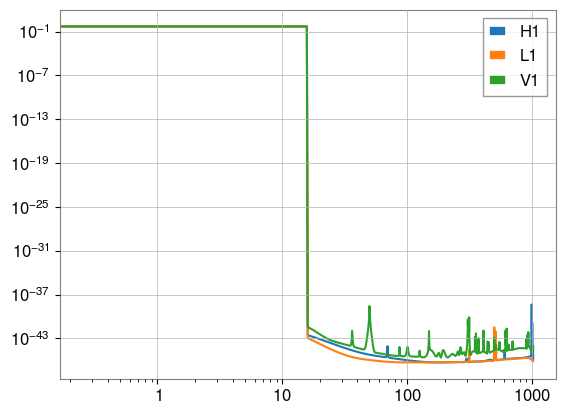

In [12]:
plt.figure()
plt.loglog(psds['H1'][:, 0], psds['H1'][:, 1], label='H1')
plt.loglog(psds['L1'][:, 0], psds['L1'][:, 1], label='L1')
plt.loglog(psds['V1'][:, 0], psds['V1'][:, 1], label='V1')
plt.legend()
plt.show()

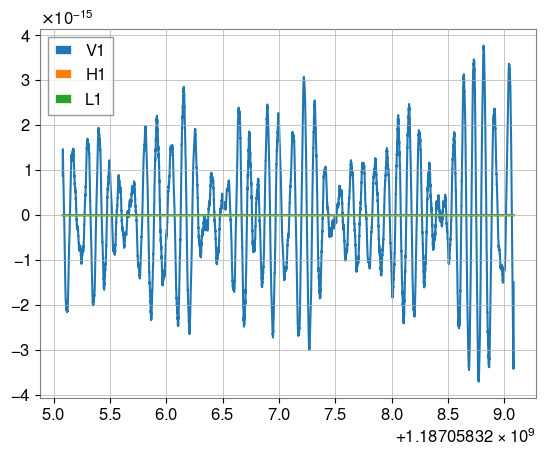

In [10]:
time_domain_strain_V1 = ifo_list[2].time_domain_strain
time_domain_strain_H1 = ifo_list[0].time_domain_strain
time_domain_strain_L1 = ifo_list[1].time_domain_strain
time_array = ifo_list[2].time_array
plt.figure()
plt.plot(time_array, time_domain_strain_V1, label='V1')
plt.plot(time_array, time_domain_strain_H1, label='H1')
plt.plot(time_array, time_domain_strain_L1, label='L1')
plt.legend()
plt.show()


/home/shunyin.cheung/.conda/envs/altenv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


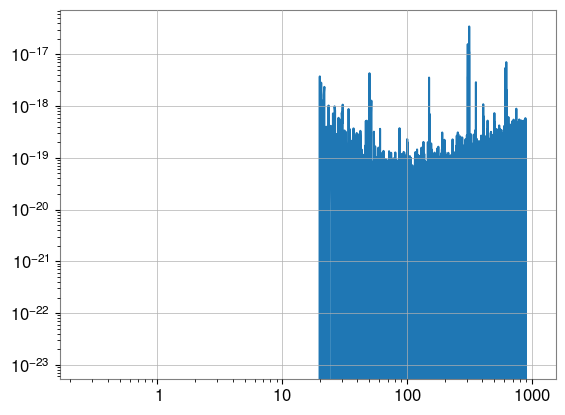

In [10]:
frequency_domain_strain = ifo_list[2].frequency_domain_strain
frequency_array = ifo_list[2].frequency_array
plt.figure()
plt.loglog(frequency_array, frequency_domain_strain)
plt.show()

In [6]:
print(samples.iloc[0].to_dict())

{'chirp_mass': 32.998254736586915, 'mass_ratio': 0.8947786175325931, 'a_1': 0.3370565831153669, 'a_2': 0.40915043659777794, 'tilt_1': 1.762066847270146, 'tilt_2': 1.4514314256527152, 'phi_12': 0.6609705523734681, 'phi_jl': 4.383066285667695, 'theta_jn': 2.714602636914769, 'psi': 2.666386312764287, 'phase': 2.8722163664327867, 'azimuth': 0.003513333509039874, 'zenith': 2.270162185132061, 'recalib_H1_amplitude_0': 0.02117223136833872, 'recalib_H1_amplitude_1': 0.003748298475110684, 'recalib_H1_amplitude_2': -0.0002792691615980888, 'recalib_H1_amplitude_3': 0.0010766897972334093, 'recalib_H1_amplitude_4': -0.007392366002823951, 'recalib_H1_amplitude_5': -0.003201183435015126, 'recalib_H1_amplitude_6': 0.0017490850842821664, 'recalib_H1_amplitude_7': 0.01150309888071284, 'recalib_H1_amplitude_8': -0.015072048690979913, 'recalib_H1_amplitude_9': -0.023264007957374686, 'recalib_H1_phase_0': -0.012077083414180031, 'recalib_H1_phase_1': -0.0014536471770771903, 'recalib_H1_phase_2': 0.000953246

In [10]:
priors2 = copy.copy(priors)

# test if bilby oscillatory waveform = gwmemory oscillatory waveform.
waveform_generator_osc = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            )

)

target_likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    ifo_list,
    waveform_generator_osc,
    #time_marginalization = True,
    #distance_marginalization = True,
    #distance_marginalization_lookup_table = '../TD.npz',
    #jitter_time=True,
    #priors = priors2,
    reference_frame ='H1L1V1',
    time_reference = args['time_reference'],
)
print('stored log likelihood', '| calculated log likelihood')
for i in range(10):
    posterior = samples.iloc[i].to_dict()
    target_likelihood.parameters.update(posterior)
    #reference_parameters = dict(luminosity_distance = priors2['luminosity_distance'],
    #                            geocent_time = priors2['geocent_time'])
    #target_likelihood.parameters.update(reference_parameters)
    likelihood = target_likelihood.log_likelihood_ratio()
    print(samples['log_likelihood'].iloc[i],likelihood)

23:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


stored log likelihood | calculated log likelihood
61.49206647861965 66988.31126453701
61.10075751046299 76812.12394257775
59.12672625501739 71460.60984735476
55.96990766273144 70162.65436848473
59.577235624802576 60233.48865784032
57.569143395324296 80432.57325349582
60.33188150841454 75769.49441680929
61.742284236457905 65048.475880082064
57.75200697712786 76101.46248772813
60.347512814011296 67216.13300731825


In [13]:
print(target_likelihood.noise_log_likelihood())

-7081.3368448975025


In [7]:
print(args['channel_dict'])

{'H1': 'DCH-CLEAN_STRAIN_C02', 'L1': 'DCH-CLEAN_STRAIN_C02', 'V1': 'Hrec_hoft_V1O2Repro2A_16384Hz'}
